# Linear Regression Example

In [1]:
import sys
sys.path.append('../../pyLearnAlgorithms')
from pyLearnAlgorithms.load_data import LoadData
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.linear_regression import LinearRegression
from pyLearnAlgorithms.split_data import SplitData
import numpy as np

In [2]:
dataset = LoadData('../tests/datasets', 'HealthInsurance.csv')
data = dataset.load_csv()

In [3]:
split = SplitData(data)
data_train, data_test, data_val = split.split_train_test_val(0.2, 0.2)
print(data_train.size)
print(data_test.size)
print(data_val.size)

12
4
4


In [4]:
data_train = dataset.convert_numpy_array(data_train)
data_test = dataset.convert_numpy_array(data_test)
data_val = dataset.convert_numpy_array(data_val)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

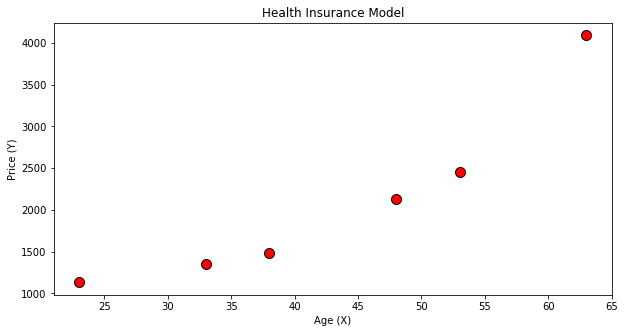

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data('Age (X)', 'Price (Y)', 'Health Insurance Model')

In [6]:
regressor = LinearRegression(X, y)
optimize_values = regressor.trainLinearReg()
print(optimize_values.fun)
print(optimize_values.x)

68919.01869585691
[-886.50783172   69.64711297]


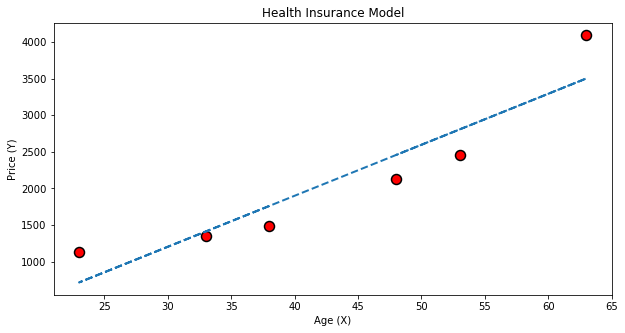

In [7]:
dataset_graph.model_linear('Age (X)', 'Price (Y)', 'Health Insurance Model')

In [8]:
train_error, val_error = regressor.learningCurve(Xval, yval)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			2.5849394142282115e-26	158526.0509036945
2			349.3290273939049	165801.95208108358
3			143.8203721345381	273142.87180294795
4			8942.351539696225	78923.88538541865
5			69439.97616992134	80852.98824781807
6			68919.01869585691	57193.08685169085


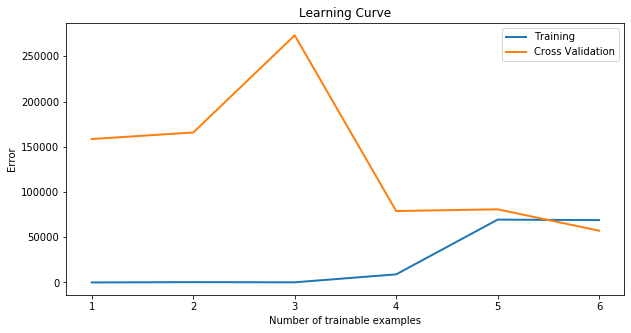

In [9]:
dataset_graph.learning_curve(train_error, val_error)

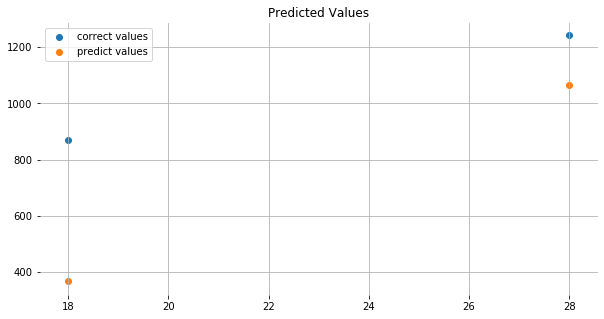

In [10]:
pred = regressor.predict(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred)

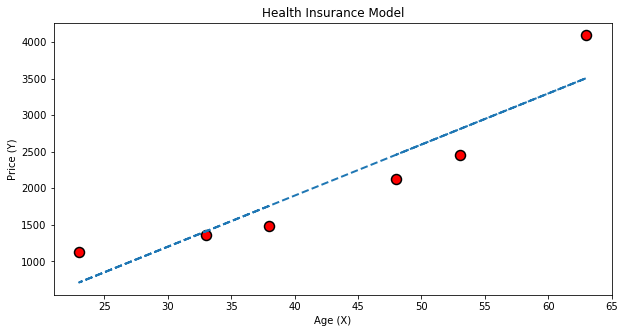

In [11]:
dataset_graph.model_linear_normal_equation('Age (X)', 'Price (Y)', 'Health Insurance Model')

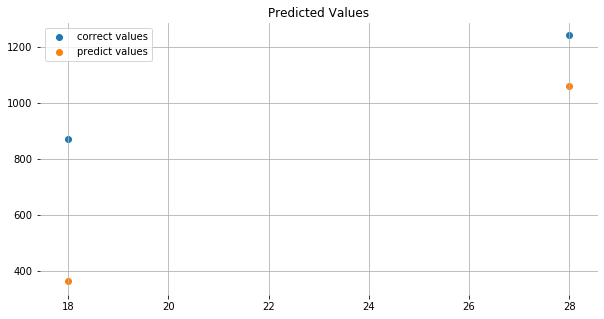

In [12]:
pred_NE = regressor.predict_normal_equation(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred_NE)